In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.12.0'

Downloading data

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Label: 0


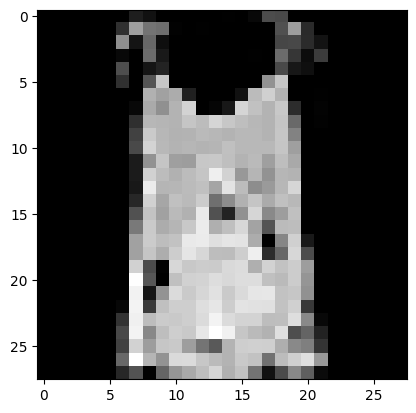

In [13]:
i = random.randint(0,100)
print("Label: %s"% train_labels[i])
plt.imshow(train_images[i], cmap='gray')

In [18]:
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

# transform from (N,28,28) to (N,784)
train_images = np.reshape(train_images, (TRAINING_SIZE, 784))
test_images = np.reshape(test_images, (TEST_SIZE, 784))

# normalizing
train_images = train_images.astype(np.float32)/255
test_images = test_images.astype(np.float32)/255

Label: 0


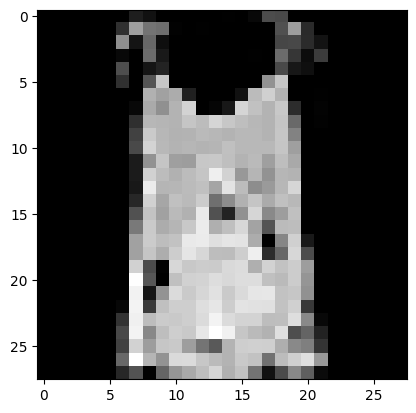

In [20]:
print("Label: %s"% train_labels[i])
plt.imshow(np.reshape(train_images[i], (28,28)), cmap='gray')

In [23]:
NUM_CAT = 10
print("Before", train_labels[0])
train_labels_ = tf.keras.utils.to_categorical(train_labels, NUM_CAT)
print("After", train_labels_[0])
test_labels_ = tf.keras.utils.to_categorical(test_labels, NUM_CAT)

Before 9
After [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512,activation=tf.nn.relu, input_dim = 784))
model.add(tf.keras.layers.Dense(206,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(NUM_CAT,activation=tf.nn.softmax))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 206)               105678    
                                                                 
 dense_5 (Dense)             (None, 10)                2070      
                                                                 
Total params: 509,668
Trainable params: 509,668
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(train_images,train_labels_,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5112 - accuracy: 0.8151
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3732 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3351 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3079 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2892 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2725 - accuracy: 0.8981
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2595 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2483 - accuracy: 0.9064
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2372 - accuracy: 0.9098
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.226

In [28]:
loss, accuracy = model.evaluate(test_images, test_labels_)
print("Test accuracy: %0.2f"%(accuracy))

313/313 [==============================] - 1s 1ms/step - loss: 0.3340 - accuracy: 0.8797
Test accuracy: 0.88
